In [2]:
### Importing relevant libraries and importing data

# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import math
from functools import reduce
from math import log
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import argrelmin, argrelmax, find_peaks
from scipy.optimize import curve_fit, minimize
from scipy import signal
import warnings
import scipy as sc
from astropy.io import fits
from astropy.table import Table, Column

hdulist = fits.open('../../Real Data/Healthy_Control_Data/Four_dots_static.fits')
data = hdulist[0].data

# Getting t data
t = np.linspace(0,500,500)

# Extracting x data and averaging
x = [ [] for i in range(46)]

for i in range(46):

    x[i] = data[0,i,0,:]

x1 = np.array(x)
x_data = np.sum(x1, axis=0)/46

# Extracting y data and averaging
y = [ [] for i in range(46)]

for i in range(46):

    y[i] = data[0,i,1,:]

y1 = np.array(y)
y_data = np.sum(y1, axis=0)/46

# Finding r data
r_data = np.sqrt(x_data**2 + y_data**2)

# Ignoring warnings printed to screen
warnings.filterwarnings("ignore")

In [3]:
### Function to compute takens emedded data for a specified delay and embedding dimension

def takens_embedding(data, delay, dimension):

    if delay*dimension > len(data):
        raise NameError('Delay times dimension exceeds length of data')       # Ensures that delay is not going to be too large such that it is larger than the data length 
    
    embedded_data = np.array([data[0:len(data)-delay*dimension]])

    for i in range(1, dimension):
        embedded_data = np.append(embedded_data, [data[i*delay:len(data) - delay*(dimension - i)]], axis=0)

    return embedded_data;

In [4]:
### Function to compute the power specttrum of the phase space

def power_spectrum(data_array,time):

    fouriert_1 = sc.fft.rfft(data_array, len(time))
    fourier_freq = sc.fft.rfftfreq(len(time), d = 1e-3)
    power_spec = np.abs(fouriert_1)**2

    return power_spec, fourier_freq

In [5]:
### Function to compute minimisation to find mid point for linear rise section of the divergence plot 

def minimisation(avlogdiv, n, m2, m1, c1, c2):

    func_to_min = m2*avlogdiv[n] + c2 - (m1*avlogdiv[n]+c1)

    return func_to_min

Text(0.5, 0.92, 'Phase space reconstruction for eye movement data - x data')

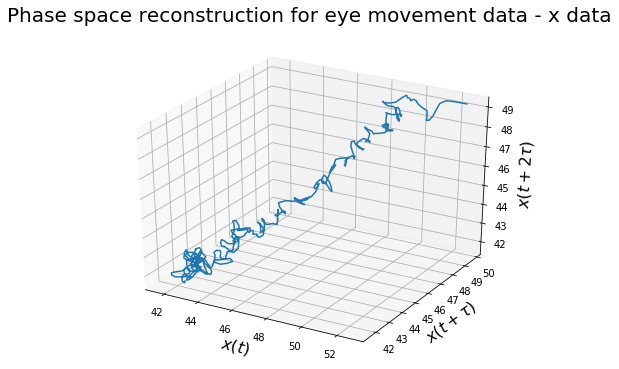

In [6]:
### Performing phase space reconstruction for x data 

embedded_x_final = takens_embedding(x_data, 22, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_x_final[0,:], embedded_x_final[1,:], embedded_x_final[2,:])
ax.set_xlabel('$x(t)$', fontsize=16)
ax.set_ylabel('$x(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$x(t+2\u03C4)$', fontsize=16)
ax.set_title('Phase space reconstruction for eye movement data - x data', fontsize=20, pad=40)

Text(0.5, 0, '$y(t+2τ)$')

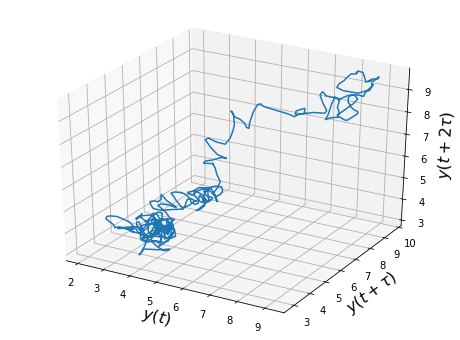

In [7]:
### Performing phase space reconstruction for y data 

embedded_y_final = takens_embedding(y_data, 18, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_y_final[0,:], embedded_y_final[1,:], embedded_y_final[2,:])
ax.set_xlabel('$y(t)$', fontsize=16)
ax.set_ylabel('$y(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$y(t+2\u03C4)$', fontsize=16)

Text(0.5, 0, '$r(t+2τ)$')

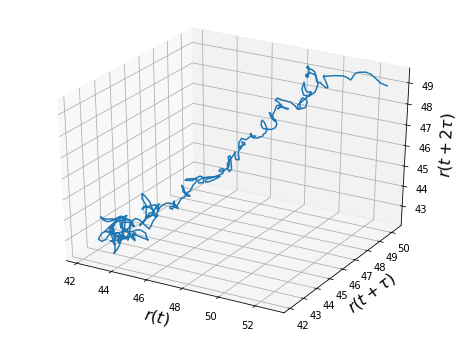

In [8]:
### Performing phase space reconstruction for r data 

embedded_r_final = takens_embedding(r_data, 16, 3)

fig = plt.figure()
fig.set_size_inches(8,6)
ax = plt.axes(projection='3d')
ax.plot3D(embedded_r_final[0,:], embedded_r_final[1,:], embedded_r_final[2,:])
ax.set_xlabel('$r(t)$', fontsize=16)
ax.set_ylabel('$r(t+\u03C4)$', fontsize=16)
ax.set_zlabel('$r(t+2\u03C4)$', fontsize=16)

250.0
The period of x data is 0.004 seconds


Text(0, 0.5, 'Power')

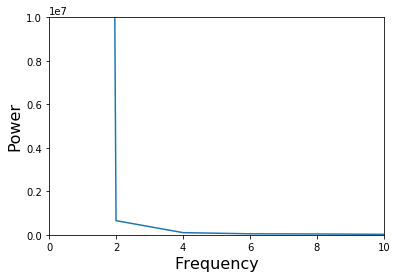

In [9]:
### Power spectrum for x data

# Calculating the power spectrum for x data 
power_spectrum_x = power_spectrum(x_data,t)
freq_x = power_spectrum_x[1]
power_x = power_spectrum_x[0]

# Finding index for the maxima on the graph
mean_freq_x = np.mean(freq_x)
period_x = 1/mean_freq_x

print(mean_freq_x)
print('The period of x data is', + period_x,'seconds')

# Plotting graph and maxima point
plt.plot(freq_x, power_x)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)

The period of y data is 0.004 seconds


Text(0, 0.5, 'Power')

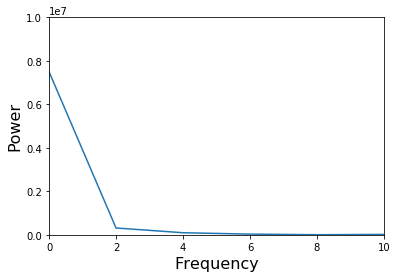

In [10]:
### Power spectrum for y data

power_spectrum_y = power_spectrum(y_data,t)
freq_y = power_spectrum_y[1]
power_y = power_spectrum_y[0]

# Finding index for the maxima on the graph
mean_freq_y = np.mean(freq_y)
period_y = 1/mean_freq_y

print('The period of y data is', + period_y,'seconds')

plt.plot(freq_y, power_y)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Power', fontsize=16)

The period of r data is 0.004 seconds


Text(0, 0.5, 'Power')

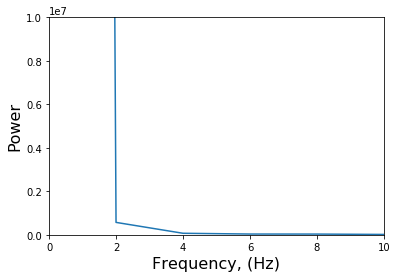

In [11]:
### Power spectrum for r data

power_spectrum_r = power_spectrum(r_data,t)
freq_r = power_spectrum_r[1]
power_r = power_spectrum_r[0]

# Finding index for the maxima on the graph
mean_freq_r = np.mean(freq_r)
period_r = 1/mean_freq_r

print('The period of r data is', + period_r,'seconds')


plt.plot(freq_r, power_r)
plt.xlim(0, 10)
plt.ylim(0, 1e7)
plt.xlabel('Frequency, (Hz)', fontsize=16)
plt.ylabel('Power', fontsize=16)

In [23]:
### Nearest neighbours for x data 

nearest_neighbours_x = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_x_final.transpose())
distances_x, indices_x = nearest_neighbours_x.kneighbors(embedded_x_final.transpose())

print(indices_x[300])

[300 301 305 306 290 299 304 307 289 308 298 291 303 302 297 309 288 296
 292 310 314 287 325 315 311 276 275 286 295 273 293 324 274 313 277 285
 312 316 294 284 326 272 382 318 283 383 389 317 250 319 323 388 269 390
 381 251 249 371 398 327 271 329 320 270 268 399 372 330 380 397 278 367
 328 322 252 321 282 366 335 378 356 331 336 379 350 351 267 370 248 400
 405 391 357 384 406 368 332 396 377 369 404 266 265 334 343 253 337 365
 333 349 387 376 347 264 373 425 407 403 342 348 401 395 424 345 346 419
 344 392 340 254 355 426 339 402 338 408 279 341 352 281 247 263 420 375
 418 386 385 393 394 241 374 364 261 262 409 423 255 358 410 240 427 411
 280 260 421 422 353 242 354 239 246 235 243 363 259 236 428 417 256 244
 245 412 231 228 230 359 237 433 432 234 227 257 238 232 229 429 431 362
 258 430]


In [13]:
### Nearest neighbours for y data 

nearest_neighbours_y = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_y_final.transpose())
distances_y, indices_y = nearest_neighbours_y.kneighbors(embedded_y_final.transpose())

print(indices_y[0])

[  0  99  98 104  95  94 100  97 103  12  96 101 102  11  39 105  13  40
   1  93  90  89  68  38  67 106  14  10  66  74  91 191  69 190 212  92
   2 211 221 107 182  73 181 192  15 222 108  37 220 198 183 218 213  65
  88 189 219  36  34  35 180 147  16 188 197  41 199 217  75 210   3 148
 146 203  33 223 161 179  23 193 162 115  72 109  24 114 202  70 204 187
 184  87   9 160 157 196  64 200  17  25 156  22  71  29 178 163 165 145
 243  49 214 116 201 144 155 164 185 216 130  26 195 113 124 186  42 224
  50 158 149 154 129 177 138 194 110  54  53  30 209 205 123  51  32 175
 139 131  27  52 122 176  63 242 159  28 244  81 174  48 143 173 125 128
 117  43 111  80 153 126 215 112 225  76  31 132  18 137 140 166 152 241
  86  55  82  62 206 226 142 134 127  44 133 136 227  79 172  21  56 118
 228   4]


In [14]:
### Nearest neighbours for r data 

nearest_neighbours_r = NearestNeighbors(n_neighbors=200, algorithm='auto').fit(embedded_r_final.transpose())
distances_r, indices_r = nearest_neighbours_r.kneighbors(embedded_r_final.transpose())

print(indices_r[0])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  19  20  15
  18  16  21  17  22  23  24  25  26  48  27  47  46  45  44  28  49  61
  63  64  60  62  43  39  38  35  36  37  40  34  70  71  29  59  69  41
  65  42  33  50  58  72  30  68  57  32  56  73  75  74  31  66  55  76
  67  54  51  53  77  52  78  79  80  87  88  86  89  85  96  81  97  95
  84  90  94  98  93  92  91  82  83  99 104 103 114 105 113 100 106 102
 112 115 101 111 110 107 108 116 109 117 124 123 126 125 122 121 127 118
 119 120 128 129 130 131 140 139 141 132 142 135 133 138 137 134 136 143
 144 153 154 145 155 146 152 151 150 147 156 149 148 157 158 161 160 162
 159 163 169 168 170 167 171 164 172 165 166 173 177 176 174 178 175 185
 186 179 184 187 188 180 183 181 182 193 189 194 192 195 201 202 190 191
 200 196]


[[ 0.     0.001  0.002 ...  0.203  0.201  0.196]
 [ 0.    -0.001  0.001 ...  0.202  0.2    0.195]
 [ 0.     0.001 -0.001 ...  0.201  0.199  0.194]
 ...
 [ 0.    -0.009 -0.01  ...  0.083  0.103 -0.107]
 [ 0.    -0.001  0.001 ... -0.104  0.098 -0.105]
 [ 0.     0.001 -0.001 ... -0.103 -0.087  0.095]]


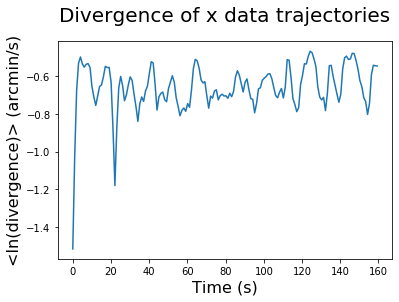

In [25]:
### Divergence for x data 

# Initialising arrays needed for divergence calculation
N = 160
separation_x1 = [ [] for i in range(N)]
logsep_x1 = [ [] for i in range(N)]
lags_x = []
xx_1 = [ [] for i in range(N)]
eps = period_x # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    xx_1[i] = indices_x[i] - i

xx_2 = np.array(xx_1)
times_x = xx_2*1e-3

for i in range(N):

    m_x = 0

    while np.abs(times_x[i][m_x]) < eps and m_x < 199:

        m_x = m_x + 1

    lags_x.append(times_x[i][m_x]) 

lags_x1 = np.array(lags_x)/1e-3
lags_x2 = lags_x1.astype(int)

# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv1 = np.sqrt((embedded_x_final[0,i+j+lags_x2[i]] - embedded_x_final[0,i+j])**2 + (embedded_x_final[1,i+j+lags_x2[i]] - embedded_x_final[1,i+j])**2 + (embedded_x_final[2,i+j+lags_x2[i]] - embedded_x_final[2,i+j])**2)
        separation_x1[j].append(divv1)


sep_x1 = np.array(separation_x1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_x1[i] = np.log(sep_x1[i])

logsep_x1 = np.array(logsep_x1)

# Calculating the averaged ln(divergence)
av_log_div_x = np.mean(logsep_x1, axis = 1)

# Performing the linear regression calculation
#t_regx = t[0:160].reshape(-1,1)
#divx_reg = av_log_div_x[0:160].reshape(-1,1)

#reg_x = LinearRegression().fit(t_regx, divx_reg)
#grad_x = reg_x.coef_.item()
#intercept_x = reg_x.intercept_.item()

#resx = av_log_div_x[0:160] - (t[0:160]*grad_x + intercept_x)
#resx_sq = np.sum(resx**2)
#tmean = np.mean(t[0:160])
#ttx = np.sum((t[0:160]-tmean)**2)

#error_x = np.sqrt((1/158)*(resx_sq/ttx))

plt.plot(t[0:160], av_log_div_x)
#plt.plot(t[0:160], t[0:160]*grad_x + intercept_x)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of x data trajectories', fontsize=20, pad=20)


#print(grad_x)
#print(error_x)


0.0032811417518691243
0.0005525562208616391


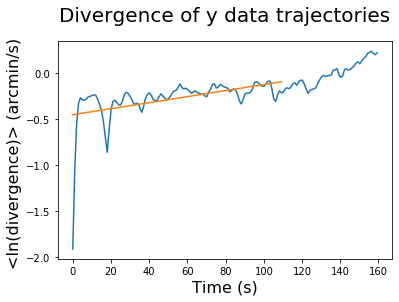

In [16]:
### Divergence for y data 

# Initialising arrays needed for divergence calculation
N = 160
separation_y1 = [ [] for i in range(N)]
logsep_y1 = [ [] for i in range(N)]
lags_y = []
yy_1 = [ [] for i in range(N)]
eps = period_y # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    yy_1[i] = indices_y[i] - i

yy_2 = np.array(yy_1)
times_y = yy_2*1e-3

for i in range(N):

    m_y = 0

    while np.abs(times_y[i][m_y]) < eps and m_y < 199:

        m_y = m_y + 1

    lags_y.append(times_y[i][m_y]) 

lags_y1 = np.array(lags_y)/1e-3
lags_y2 = lags_y1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_y = np.sqrt((embedded_y_final[0,i+j+lags_y2[i]] - embedded_y_final[0,i+j])**2 + (embedded_y_final[1,i+j+lags_y2[i]] - embedded_y_final[1,i+j])**2 + (embedded_y_final[2,i+j+lags_y2[i]] - embedded_y_final[2,i+j])**2)
        separation_y1[j].append(divv_y)


sep_y1 = np.array(separation_y1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_y1[i] = np.log(sep_y1[i])

logsep_y1 = np.array(logsep_y1)

# Calculating the averaged ln(divergence)
av_log_div_y = np.mean(logsep_y1, axis = 1)

# Performing the linear regression calculation
t_regy = t[0:110].reshape(-1,1)
divy_reg = av_log_div_y[0:110].reshape(-1,1)

reg_y = LinearRegression().fit(t_regy, divy_reg)
grad_y = reg_y.coef_.item()
intercept_y = reg_y.intercept_.item()

resy = av_log_div_y[0:110] - (t[0:110]*grad_y + intercept_y)
resy_sq = np.sum(resy**2)
tmean_y = np.mean(t[0:110])
tty = np.sum((t[0:110]-tmean_y)**2)

error_y = np.sqrt((1/108)*(resy_sq/tty))

plt.plot(t[0:160], av_log_div_y)
plt.plot(t[0:110], t[0:110]*grad_y + intercept_y)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s) ', fontsize=16)
plt.title('Divergence of y data trajectories', fontsize=20, pad=20)

print(grad_y)
print(error_y)


0.0017865693120261666
0.001833295720607966


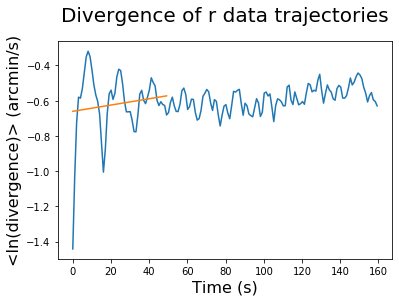

In [17]:
### Divergence for r data 

# Initialising arrays needed for divergence calculation
N = 160
separation_r1 = [ [] for i in range(N)]
logsep_r1 = [ [] for i in range(N)]
lags_r = []
rr_1 = [ [] for i in range(N)]
eps = period_r # Change this when period worked out from power spectrum    


# Extracting time differences between nearest neighbours
for i in range(N):
    rr_1[i] = indices_r[i] - i

rr_2 = np.array(rr_1)
times_r = rr_2*1e-3

for i in range(N):

    m_r = 0

    while np.abs(times_r[i][m_r]) < eps and m_r < 199:

        m_r = m_r + 1

    lags_r.append(times_r[i][m_r]) 

lags_r1 = np.array(lags_r)/1e-3
lags_r2 = lags_r1.astype(int)


# Calculating the divergence for Lyapunov exponent calculation
for i in range(0,N):
    
    for j in range(0,N):

        divv_r = np.sqrt((embedded_r_final[0,i+j+lags_r2[i]] - embedded_r_final[0,i+j])**2 + (embedded_r_final[1,i+j+lags_r2[i]] - embedded_r_final[1,i+j])**2 + (embedded_r_final[2,i+j+lags_r2[i]] - embedded_r_final[2,i+j])**2)
        separation_r1[j].append(divv_r)


sep_r1 = np.array(separation_r1)

# Taking the logarithm of the divergence array
for i in range(N):

    logsep_r1[i] = np.log(sep_r1[i])

logsep_r1 = np.array(logsep_r1)

# Calculating the averaged ln(divergence)
av_log_div_r = np.mean(logsep_r1, axis = 1)

# Performing the linear regression calculation
t_regr = t[0:50].reshape(-1,1)
divr_reg = av_log_div_r[0:50].reshape(-1,1)

reg_r = LinearRegression().fit(t_regr, divr_reg)
grad_r = reg_r.coef_.item()
intercept_r = reg_r.intercept_.item()

resr = av_log_div_r[0:50] - (t[0:50]*grad_r + intercept_r)
resr_sq = np.sum(resr**2)
tmean_r = np.mean(t[0:50])
ttr = np.sum((t[0:50]-tmean_r)**2)

error_r = np.sqrt((1/48)*(resr_sq/ttr))

plt.plot(t[0:160], av_log_div_r)
plt.plot(t[0:50], t[0:50]*grad_r + intercept_r)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('<ln(divergence)> (arcmin/s)', fontsize=16)
plt.title('Divergence of r data trajectories', fontsize=20, pad=20)

print(grad_r)
print(error_r)